In [1]:
from First_Dataset import First_Dataset

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\moham\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\moham\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\moham\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
max_words = 5000
max_len = 50

In [3]:
dataset = First_Dataset()
dataset.preprocess()
dataset.split()
dataset.encode_labels()
dataset.embed_tokens(max_words,max_len)
Training_pad, Validation_pad, Testing_pad, Y_train, Y_val, Y_test = dataset.getData()

In [4]:
from BiLSTM import BiLSTM

In [5]:
model = BiLSTM(max_words, max_len)

In [6]:
# model.plot_model()

In [7]:
model.fit(Training_pad,Y_train, Validation_pad, Y_val)

Epoch 1/50


140/140 [==============================] - 7s 20ms/step - loss: 2.6596 - accuracy: 0.8478 - val_loss: 0.6261 - val_accuracy: 0.7442 - lr: 0.0010
Epoch 2/50
140/140 [==============================] - 2s 13ms/step - loss: 0.1824 - accuracy: 0.9620 - val_loss: 0.6125 - val_accuracy: 0.7442 - lr: 0.0010
Epoch 3/50
140/140 [==============================] - 2s 12ms/step - loss: 0.1347 - accuracy: 0.9723 - val_loss: 0.3489 - val_accuracy: 0.8945 - lr: 0.0010
Epoch 4/50
140/140 [==============================] - 2s 11ms/step - loss: 0.0951 - accuracy: 0.9839 - val_loss: 0.4818 - val_accuracy: 0.8569 - lr: 0.0010
Epoch 5/50
140/140 [==============================] - 2s 12ms/step - loss: 0.0795 - accuracy: 0.9884 - val_loss: 0.3409 - val_accuracy: 0.9088 - lr: 0.0010
Epoch 6/50
140/140 [==============================] - 2s 12ms/step - loss: 0.0668 - accuracy: 0.9928 - val_loss: 0.4347 - val_accuracy: 0.8909 - lr: 0.0010
Epoch 7/50
140/140 [==============================] - 2s 12ms/

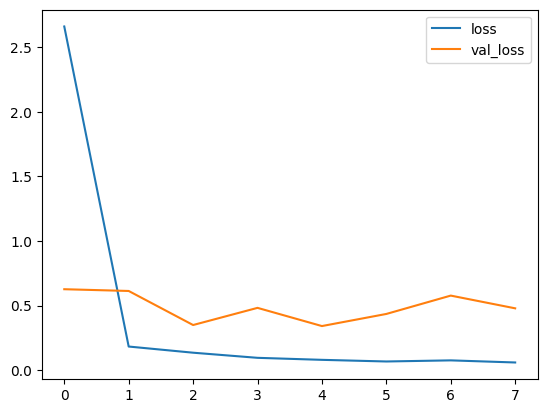

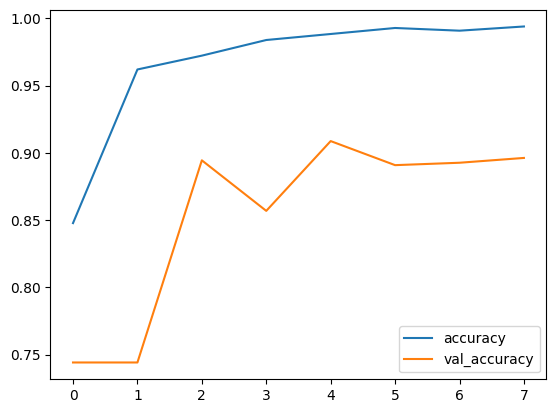

In [8]:
model.plot_history()

In [9]:
model.test(Testing_pad, Y_test)

18/18 [==============================] - 0s 4ms/step - loss: 0.2649 - accuracy: 0.9179
